<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [4]:
def convolution2d(image, kernel):
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape

  pad_h = kernel_height // 2
  pad_w = kernel_width // 2

  z = np.zeros((image_height, image_width))

  padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

  for x in range(image_width):
    for y in range(image_height):
      for k1 in range(kernel_width):
        for k2 in range(kernel_height):
          z[y, x] += kernel[k2, k1] * padded_image[y + k2, x + k1]

  return z

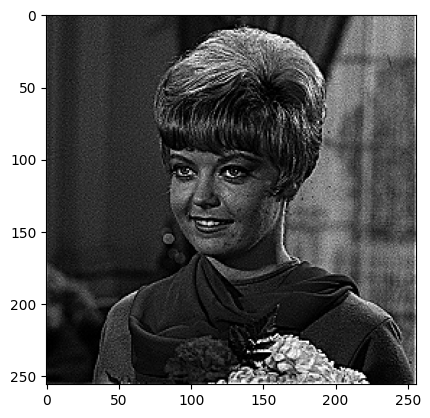

In [21]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])

img_sharpen = convolution2d(img, kernel_sharpen)

img_sharpen = np.clip(img_sharpen, 0, 255)

img_sharpen = img_sharpen.astype(np.uint8)

plt.imshow(img_sharpen, cmap='gray')

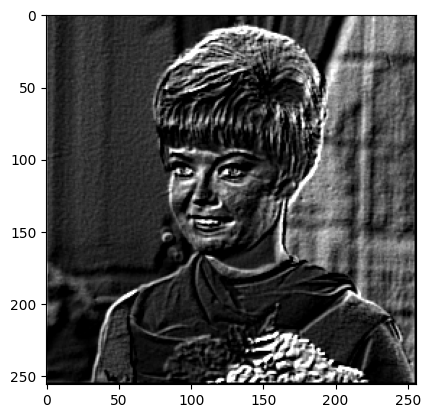

In [22]:
kernel_emboss = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])

img_emboss = convolution2d(img, kernel_emboss)

img_emboss = np.clip(img_emboss, 0, 255)

img_emboss = img_emboss.astype(np.uint8)

plt.imshow(img_emboss, cmap='gray')

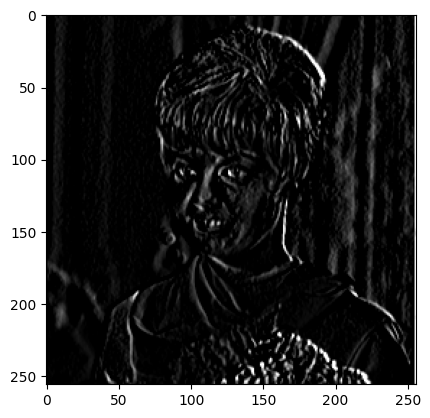

In [23]:
kernel_leftsobel_edgedetect = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

img_leftsobel_edgedetect = convolution2d(img, kernel_leftsobel_edgedetect)

img_leftsobel_edgedetect = np.clip(img_leftsobel_edgedetect, 0, 255)

img_leftsobel_edgedetect = img_leftsobel_edgedetect.astype(np.uint8)

plt.imshow(img_leftsobel_edgedetect, cmap='gray')

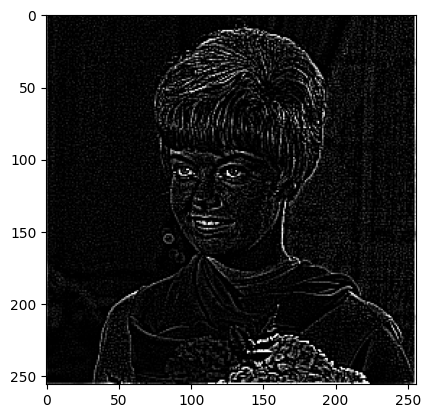

In [24]:
kernel_cannyedgedetect = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

img_cannyedgedetect = convolution2d(img, kernel_cannyedgedetect)

img_cannyedgedetect = np.clip(img_cannyedgedetect, 0, 255)

img_cannyedgedetect = img_cannyedgedetect.astype(np.uint8)

plt.imshow(img_cannyedgedetect, cmap='gray')

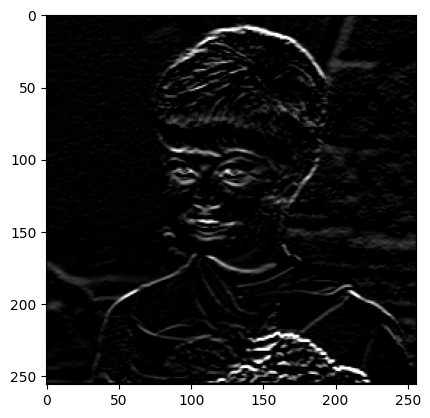

In [25]:
kernel_prewittedgedetect = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])

img_prewittedgedetect = convolution2d(img, kernel_prewittedgedetect)

img_prewittedgedetect = np.clip(img_prewittedgedetect, 0, 255)

img_prewittedgedetect = img_prewittedgedetect.astype(np.uint8)

plt.imshow(img_prewittedgedetect, cmap='gray')

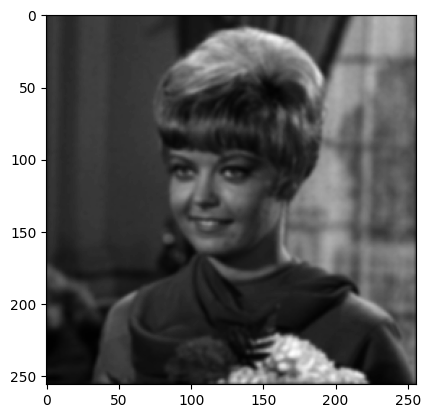

In [26]:
kernel_5x5gaussblurr = np.array([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]]) / 256

img_5x5gaussblurr = convolution2d(img, kernel_5x5gaussblurr)

img_5x5gaussblurr = np.clip(img_5x5gaussblurr, 0, 255)

img_5x5gaussblurr = img_5x5gaussblurr.astype(np.uint8)

plt.imshow(img_5x5gaussblurr, cmap='gray')

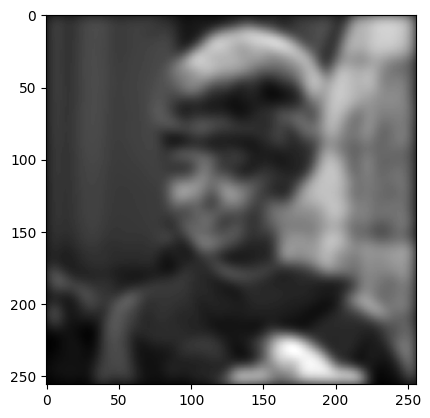

In [27]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img_gaussianblurr = convolution2d(img, gauss_kernel)

img_gaussianblurr = np.clip(img_gaussianblurr, 0, 255)

img_gaussianblurr = img_gaussianblurr.astype(np.uint8)

plt.imshow(img_gaussianblurr, cmap='gray')